
# CLUSTERING Contract DATA 
         
Clustering is a type of **Unsupervised Machine Learning**, which can determine relationships of unlabeled data.  
This notebook will show how to get and prepare data for exploration of clustering methods.  
This notebook will use scikit-learn for machine learning processes.

### Data information
Test K Means over detail and summarized government IT contracts 

### Dependencies

In [1]:
import pandas as pd
import csv
import os 
import numpy as np
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
#from pandas.tools.plotting import scatter_matrix
from __future__ import print_function
import urllib.request
from sklearn.feature_selection import SelectFromModel
from sklearn.decomposition import PCA
from sklearn import preprocessing
matplotlib.style.use('ggplot')
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans

from sklearn.preprocessing import MinMaxScaler, StandardScaler,RobustScaler, Normalizer
import seaborn as sns
import matplotlib.pyplot as plt
from time import time
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
%matplotlib inline 
import matplotlib.cm as cm
from sklearn.cluster import AgglomerativeClustering
import warnings
from sklearn.metrics import silhouette_samples, silhouette_score

### Preparing Data
Use pandas to prepare data for machine learning.


In [37]:
#Reading in my own data
file_name = os.path.join(os.getcwd(), "out1.csv")

df = pd.read_csv(file_name,skipinitialspace=True)

Look at the structure of the data.

In [38]:
df.head()

,Unnamed: 0,tid,unique_award_id,dollars_obligated,naics_code,fiscalyear,level_3_cat_delivery,level_3_cat_securitycompliance,level_3_cat_storage,level_3_cat_enduser,...,Cnr_STARS8A,Cnr_VETTECHSERV,Cnr_Wireless Mobility Solutions,AT_A BPA CALL,AT_B IDC,AT_B PURCHASE ORDER,AT_C DELIVERY ORDER,AT_D DEFINITIVE CONTRACT,FD_Civilian,FD_DOD
0,0,471970,GS00T07NSD0038HC101318FJ876,230.14,517110.0,2020,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,1,472122,GS35F0426RDJJ15FUSA230016,-185.47,517110.0,2018,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,2,472216,GS35F218CAFA489015F0029,0.00,541519.0,2015,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,3,472242,GS35F0119PHC101315FC037,0.00,541519.0,2016,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,4,473172,GS35F0511TN6523617F0822,38271.56,443120.0,2017,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [5]:
df.columns

Index(['Unnamed: 0', 'tid', 'unique_award_id', 'dollars_obligated',
       'naics_code', 'fiscalyear', 'level_3_cat_delivery',
       'level_3_cat_securitycompliance', 'level_3_cat_storage',
       'level_3_cat_enduser', 'level_3_cat_platform',
       'level_3_cat_application', 'level_3_cat_compute',
       'level_3_cat_itmanagement', 'level_3_cat_network',
       'level_3_cat_datacenter', 'level_2_cat_itprof', 'level_2_cat_products',
       'level_2_cat_caas', 'eighta', 'co_bus_size_sba', 'biz_rule_tiert1',
       'biz_rule_tiert2', 'biz_rule_tierbic', 'biz_rule_tier0', 'award', 'idv',
       'department_name', 'funding_agency_name', 'funding_cfo_act_agency',
       'vdo1_booz', 'vdo2_none', 'vdo3_dfs', 'vdo4_saic', 'vdo5_cara',
       'vdo6_ipsi', 'vdo7_attc', 'vdo8_acct', 'vdo9_srac', 'vd10_ibm',
       'vd11_other', 'va01_none', 'va02_solv', 'va03_cara', 'va04_attc',
       'va05_cell', 'va06_mcic', 'va07_dlts', 'va08_attm', 'va09_qwes',
       'va10_dellm', 'va11_other', 'descript

In [39]:
#columns to drop for this exercise - 'department_name', 'funding_agency_name', 'funding_cfo_act_agency'
#,'description_of_requirement', 'psc_desc'
df.head(1)


In [74]:
#drop columns
df2 = df.drop(df.columns[[0,1,2,27,28,29,52,53]], axis = 1)
print(len(df2.columns),len(df.columns))
df2.columns

65 73


Index(['dollars_obligated', 'naics_code', 'fiscalyear', 'level_3_cat_delivery',
       'level_3_cat_securitycompliance', 'level_3_cat_storage',
       'level_3_cat_enduser', 'level_3_cat_platform',
       'level_3_cat_application', 'level_3_cat_compute',
       'level_3_cat_itmanagement', 'level_3_cat_network',
       'level_3_cat_datacenter', 'level_2_cat_itprof', 'level_2_cat_products',
       'level_2_cat_caas', 'eighta', 'co_bus_size_sba', 'biz_rule_tiert1',
       'biz_rule_tiert2', 'biz_rule_tierbic', 'biz_rule_tier0', 'award', 'idv',
       'vdo1_booz', 'vdo2_none', 'vdo3_dfs', 'vdo4_saic', 'vdo5_cara',
       'vdo6_ipsi', 'vdo7_attc', 'vdo8_acct', 'vdo9_srac', 'vd10_ibm',
       'vd11_other', 'va01_none', 'va02_solv', 'va03_cara', 'va04_attc',
       'va05_cell', 'va06_mcic', 'va07_dlts', 'va08_attm', 'va09_qwes',
       'va10_dellm', 'va11_other', 'trxyear', 'Cnr_ALLIANT', 'Cnr_CONNECTIONS',
       'Cnr_EIS', 'Cnr_MAS', 'Cnr_MILLENIAL', 'Cnr_SALESFORCE', 'Cnr_SATCOM',
       '

Select columns that will be used as features for Machine Learning.

In [75]:
#I'm using them all except categorical, which were removed in a previous step

x = df2

Dealing with missing values can be done by removing rows with missing data....

In [76]:
#check number of rows
print ("original number of rows:  %d" % (len(x.index)))

#see the nan rows
x[x.isna().any(axis=1)]

#remove rows
x1 = x.dropna()
print ("new number of rows:  %d" % (len(x1.index)))


original number of rows:  528640
new number of rows:  527775


Or imputating missing values with the interpolate function from pandas.

In [77]:
## all Nans to white space

x1 = x1.replace(np.nan, ' ', regex = True)
x1 = x1.replace(np.nan, 'NaN', regex = True)
"""
## convert to all floats
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    x = x.convert_objects(convert_numeric = True)
x = x.interpolate()
"""
x1.isnull().any().any() ## to check if any missing data

x1 = x1.dropna()

In [ ]:
#naics_code is really an int
x1['naics_code']=x1['naics_code'].astype('int64')

Prepare features by converting the dataframe into an array.

In [83]:
# features into array
features = x1.values

To see variance of features: boxplot (from Seaborn) can be used with the MinMaxscaler (from scikit-learn) to visualize this.

<AxesSubplot:>

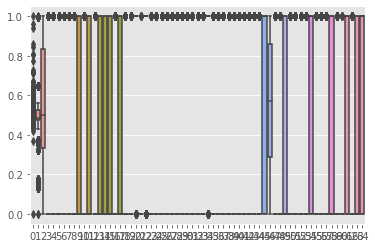

In [84]:
min_max_scaler = MinMaxScaler()
fmm = min_max_scaler.fit_transform(features)
fmX = pd.DataFrame(fmm)

ax = sns.boxplot(data=fmX)
ax

**Start with K-means since it's simple.**  
Read more about [**K-Means**](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans).  
The parameter that K-Means utilizes is the number of clusters or k.

Pick a number of clusters or k for K-Means, and check its performance by using the [silhouette score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html), the metric that assesses the variance of objects within clusters. *Score closer to 1 is best.*

In [85]:
x1[x1.isna().any(axis=1)]

,dollars_obligated,naics_code,fiscalyear,level_3_cat_delivery,level_3_cat_securitycompliance,level_3_cat_storage,level_3_cat_enduser,level_3_cat_platform,level_3_cat_application,level_3_cat_compute,...,Cnr_STARS8A,Cnr_VETTECHSERV,Cnr_Wireless Mobility Solutions,AT_A BPA CALL,AT_B IDC,AT_B PURCHASE ORDER,AT_C DELIVERY ORDER,AT_D DEFINITIVE CONTRACT,FD_Civilian,FD_DOD


In [93]:
x1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 527775 entries, 0 to 528639
Data columns (total 65 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   dollars_obligated                527775 non-null  float64
 1   naics_code                       527775 non-null  int64  
 2   fiscalyear                       527775 non-null  int64  
 3   level_3_cat_delivery             527775 non-null  int64  
 4   level_3_cat_securitycompliance   527775 non-null  int64  
 5   level_3_cat_storage              527775 non-null  int64  
 6   level_3_cat_enduser              527775 non-null  int64  
 7   level_3_cat_platform             527775 non-null  int64  
 8   level_3_cat_application          527775 non-null  int64  
 9   level_3_cat_compute              527775 non-null  int64  
 10  level_3_cat_itmanagement         527775 non-null  int64  
 11  level_3_cat_network              527775 non-null  int64  
 12  le

In [80]:
x1.dollars_obligated.max()

355249230.4

In [92]:
start = datetime.now()
k = 10
cluster = KMeans(init='k-means++', n_clusters=k, n_init=12)
cluster.fit(features)
sscore = metrics.silhouette_score(features, cluster.labels_)
end = datetime.now()
print(k,start, end, sscore)
# 4 @ 0.9617675504696487, 6 @ 0.95, 8 @ 0.9069364059648168
#10, 2022-05-18 07:57:29.982479, 2022-05-18 08:46:01.014783, 0.8918228041435732

10 2022-05-18 07:57:29.982479 2022-05-18 08:46:01.014783 0.8918228041435732


**Model selection** can be done by looping through a range of k.
This could also include looping through different types of clustering methods that uses k or number of clusters as a parameter. 

The loop includes K-Means and the following clustering methods:  

* [**MiniBatch K-Means**](http://scikit-learn.org/stable/modules/clustering.html#mini-batch-kmeans) is the same as K-means but uses mini-batches to reduce computation time 
* [**Agglomerative Clustering**](http://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering)  performs heirarchical clustering and can be used with 3 three different merge or linkage strategies : 
  * **Ward**
  * **Complete**
  * **Average**

The result of the loop is a ranking of the silhouette scores of the different methods and k explored.

*Pick a range of k to explore.*

In [94]:
# adapted from http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html
range_n_clusters = range(4,6)
List1 = []
List2 = []
List3 = []
 
for n_clusters in range_n_clusters:
    def bench_clustering(estimator, name, data):
        estimator.fit(data)
        v1 = name 
        v2 = n_clusters
        v3 = metrics.silhouette_score(data, estimator.labels_)

        List1.append(v1)
        List2.append(v2)
        List3.append(v3)

    bench_clustering(KMeans(init='k-means++', n_clusters=n_clusters, n_init=12),
                  name="K-Means", data=features)
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        bench_clustering(MiniBatchKMeans(init='k-means++', n_clusters=n_clusters, n_init=12,max_no_improvement=10, verbose=0,random_state=0),
                     name="MiniBatchKMeans", data=features)
    bench_clustering(AgglomerativeClustering(n_clusters=n_clusters, linkage='ward'),
                  name="Ward", data=features)   

    bench_clustering(AgglomerativeClustering(n_clusters=n_clusters, linkage='average'),
                  name="Average", data=features)  
    
    bench_clustering(AgglomerativeClustering(n_clusters=n_clusters, linkage='ward'),
                  name="Complete", data=features) 
d = pd.DataFrame()
d['method'] = List1 
d['k'] = List2
d['silhouette_score'] = List3
d = d.sort_values(['silhouette_score'], ascending = False)
print (d)

MemoryError: Unable to allocate 1.01 TiB for an array with shape (139272961425,) and data type float64

[**Silhouette plot analysis**](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html) can also aid with model selection. The relationship of objects within each cluster can be assessed visually.  

*Pick a range of k to explore.* (Below is used with K-Means, but can be used with the other clustering methods that use k as a parameter, as mentioned above.)

For n_clusters = 4 The average silhouette_score is : 0.9617458922469573


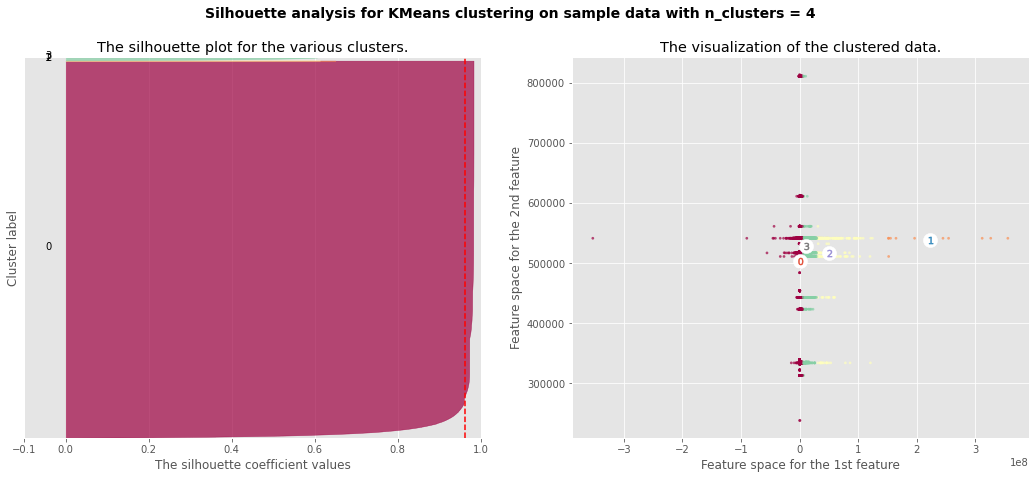

In [ ]:
#adapted from http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py

range_n_clusters = range(4,6)

for n_clusters in range_n_clusters:
    
    cluster = KMeans(init='k-means++', n_clusters=n_clusters, n_init=12)
    cluster.fit(features)
    metrics.silhouette_score(features, cluster.labels_)

    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(features) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = cluster
    cluster_labels = clusterer.fit_predict(features)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(features, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(features, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        cmap = cm.get_cmap("Spectral")
        #colors = cmap(a / b)

        color = cmap(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhoutte score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cmap(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(features[:, 0], features[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

**Visualizing Clusters** - 
The example below shows the clusters and their centroids.
Seeing the shape of the clusters and the location of the centroids can help with further analysis.

*Pick a k to explore.* (Below is used with K-Means, but can be used with the other clustering methods that use k as a parameter, as mentioned above.)


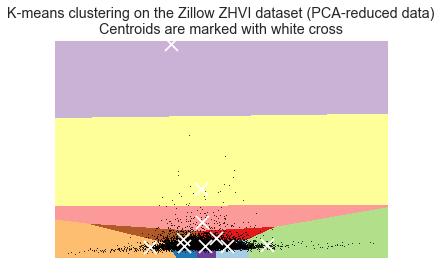

In [15]:
#adapted from http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html#sphx-glr-auto-examples-cluster-plot-kmeans-digits-py

n_clusters = 10
f_scaled = scale(features)
reduced_data = PCA(n_components=2).fit_transform(f_scaled)
kmeans = KMeans(init='k-means++', n_clusters=n_clusters, n_init=10)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the Zillow ZHVI dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()


# *Not getting good silhouette scores?*
Try adding more features from [Zillow/data](http://www.zillow.com/research/data/).  
There are also many other clustering methods with scikit-learn to explore [here](http://scikit-learn.org/stable/modules/clustering.html#clustering).